**Rules for the code:**

- Include all the code you used for your report in this file. The code for any section in the report should go under the same section in this file.
- Any missing code will result in -20% from its corresponding section in the report.
- Any irrelevant code will result in -20% from its corresponding section in the report.
- Make sure that you run your code before rendering, so all the necessary visual/numeric outputs are visible.
- Any code that is not properly run or throws errors will be considered missing/irrelevant.

## 3) Data

In [9]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

soccer = pd.read_csv('../data/fifa_players.csv')

## 5) Data Cleaning 

### a) Cleaning - Question 1

In [10]:
# Question: Who are the best three midfielders? What makes them better than the rest?

midfielder_position = 'CDM'
midfielder_info = ['name', 'age', 'positions','overall_rating', 'potential', 'value_euro', 'short_passing', 'dribbling', 'long_passing', 'ball_control', 'acceleration', 'stamina', 'strength', 'aggression', 'interceptions', 'positioning', 'vision','composure', 'marking', 'standing_tackle', 'sliding_tackle']

midfielders_df = soccer[soccer['positions'].str.contains('CDM', case=False)]

midfielders_df.isnull().sum()

name                                0
full_name                           0
birth_date                          0
age                                 0
height_cm                           0
weight_kgs                          0
positions                           0
nationality                         0
overall_rating                      0
potential                           0
value_euro                         45
wage_euro                          45
preferred_foot                      0
international_reputation(1-5)       0
weak_foot(1-5)                      0
skill_moves(1-5)                    0
body_type                           0
release_clause_euro               267
national_team                    2554
national_rating                  2554
national_team_position           2554
national_jersey_number           2554
crossing                            0
finishing                           0
heading_accuracy                    0
short_passing                       0
volleys     

### b) Cleaning - Question 2

In [11]:
# What factors strongly influence a players overall rating? Overall market value? 

# Filtering out variables that won't have an effect on the outcome of the variable
soccer.columns
unwanted_col = ['nationality', 'national_jersey_number','national_team_position', 'release_clause_euro', 'wage_euro']

rating_influence = soccer.drop(columns = unwanted_col)

rating_influence.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",94,94,110500000.0,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",88,89,69500000.0,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",88,91,73000000.0,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",88,88,62000000.0,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,88,91,60000000.0,...,15,87,88,24,49,33,80,91,88,87


In [12]:
# Filtering out only the defenders for when looking at the defenders and what characteristics have a great impact on there overall rating
attackers = ['CF', 'RW', 'ST', 'LW', 'RM', 'LM', 'CAM', 'CM']

attacking_players = rating_influence[rating_influence['positions'].str.contains('|'.join(attackers))]

attacking_players.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",94,94,110500000.0,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",88,89,69500000.0,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",88,91,73000000.0,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",88,88,62000000.0,...,84,34,26,83,87,61,83,51,24,22
6,K. Mbappé,Kylian Mbappé,12/20/1998,20,152.40,73.0,"RW,ST,RM",88,95,81000000.0,...,78,62,38,88,82,70,86,34,34,32


In [13]:
# Filtering out only the defenders for when looking at the defenders and what characteristics have a great impact on there overall rating
defenders = ['CB','LB','RB','CDM','RM','LM','GK', 'RWB','LWB']

defending_players = rating_influence[rating_influence['positions'].str.contains('|'.join(defenders))]

defending_players.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",88,89,69500000.0,...,89,46,56,84,91,67,88,59,57,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,88,91,60000000.0,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,Virgil van Dijk,7/8/1991,27,193.04,92.1,CB,88,90,59500000.0,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,Kylian Mbappé,12/20/1998,20,152.40,73.0,"RW,ST,RM",88,95,81000000.0,...,78,62,38,88,82,70,86,34,34,32
8,M. Neuer,Manuel Neuer,3/27/1986,32,193.04,92.1,GK,89,89,38000000.0,...,16,29,30,12,70,47,70,17,10,11


### c) Cleaning - Question 3

In [14]:
# How does player performance vary by age?

# Making sure that there isn't any missing variables in the age variable 
soccer['age'].isnull().sum() # No cleaning has to be done

0

In [15]:
max_age = soccer['age'].max()
min_age = soccer['age'].min()
print(f'The age of the players in the dataset ranges from {min_age} to {max_age}.')

age_analysis = soccer.copy()
age_analysis['age_bins'] = pd.cut(age_analysis['age'], bins=[17,21,29,38,46], labels =['Young Adults', 'Adults', 'Senior Adults', 'Veterans'])


The age of the players in the dataset ranges from 17 to 46.


### d) Cleaning - Question 4

In [16]:
# Which nationalities produce the highest-rated players, and how consistent is player quality across countries?
soccer.shape[0]-soccer['national_team'].isnull().sum() 
# There are only 857 players that play for there national team



857

## 6) Data Analysis

### a) Analysis 1

In [17]:
midfielders_df = soccer[soccer['positions'].str.contains("CDM", case=False, na=False)]

mid_info_df = midfielders_df[midfielder_info]

mid_info_df

,name,age,positions,overall_rating,potential,value_euro,short_passing,dribbling,long_passing,ball_control,...,stamina,strength,aggression,interceptions,positioning,vision,composure,marking,standing_tackle,sliding_tackle
10,Sergio Busquets,30,"CDM,CM",89,89,51500000.0,89,80,82,88,...,86,77,85,87,77,87,93,90,86,80
17,Fernandinho,33,CDM,87,87,20500000.0,85,77,83,82,...,84,76,87,89,70,75,79,87,86,80
19,I. Rakitić,30,"CM,CDM",87,87,46500000.0,87,82,90,85,...,83,71,67,81,80,86,86,76,75,73
25,Thiago,27,"CM,CAM,CDM",87,87,51500000.0,90,90,87,90,...,75,59,56,78,79,86,85,67,67,71
30,Casemiro,27,CDM,87,89,50500000.0,83,69,82,78,...,87,89,89,86,69,77,84,84,87,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17895,Marquinhos,24,"CB,CDM",85,90,43500000.0,81,59,78,79,...,75,75,80,85,54,58,86,85,87,87
17901,M. Pjanić,28,"CM,CDM",86,86,44000000.0,89,86,85,89,...,78,66,70,78,70,88,86,75,74,70
17908,M. Verratti,26,"CM,CDM",86,89,55000000.0,90,90,89,88,...,77,52,89,84,71,87,95,78,83,80
17913,J. Kimmich,24,"RB,CM,CDM",86,88,45000000.0,87,80,83,85,...,94,64,79,80,80,79,82,75,81,79


In [18]:
best_cdm = mid_info_df.sort_values(by='overall_rating', ascending = False)

top5_cdm = best_cdm.rank(axis=0, numeric_only=True, ascending=False, method='first').head(5)

top5_cdm

,age,overall_rating,potential,value_euro,short_passing,dribbling,long_passing,ball_control,acceleration,stamina,strength,aggression,interceptions,positioning,vision,composure,marking,standing_tackle,sliding_tackle
10,520.0,1.0,5.0,3.0,4.0,32.0,35.0,3.0,2459.0,193.0,454.0,110.0,4.0,24.0,4.0,2.0,1.0,6.0,24.0
17929,1058.0,2.0,1.0,1.0,14.0,41.0,52.0,73.0,21.0,1.0,561.0,13.0,1.0,137.0,48.0,19.0,2.0,1.0,8.0
19,521.0,3.0,17.0,6.0,10.0,16.0,1.0,12.0,1117.0,342.0,1139.0,1473.0,60.0,5.0,6.0,12.0,137.0,261.0,206.0
30,1059.0,4.0,6.0,5.0,50.0,504.0,36.0,142.0,1789.0,160.0,28.0,29.0,10.0,203.0,111.0,24.0,11.0,4.0,3.0
25,1060.0,5.0,18.0,4.0,1.0,1.0,4.0,1.0,72.0,1000.0,2259.0,2328.0,135.0,9.0,7.0,20.0,847.0,1109.0,329.0


In [19]:
best_cdms = soccer.loc[top5_cdm.index, :]

best_cdms

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
10,Sergio Busquets,Sergio Busquets i Burgos,7/16/1988,30,187.96,76.2,"CDM,CM",Spain,89,89,...,54,85,87,77,87,60,93,90,86,80
17929,N. Kanté,N'Golo Kanté,3/29/1991,27,167.64,72.1,"CDM,CM",France,89,90,...,69,90,92,71,80,54,85,90,91,85
19,I. Rakitić,Ivan Rakitić,3/10/1988,30,182.88,78.0,"CM,CDM",Croatia,87,87,...,87,67,81,80,86,82,86,76,75,73
30,Casemiro,Carlos Henrique Venancio Casimiro,2/23/1992,27,185.42,83.9,CDM,Brazil,87,89,...,81,89,86,69,77,66,84,84,87,86
25,Thiago,Thiago Alcântara do Nascimento,4/11/1991,27,175.26,69.9,"CM,CAM,CDM",Spain,87,87,...,79,56,78,79,86,75,85,67,67,71


In [20]:
best_cdm.corrwith(best_cdm['overall_rating'], numeric_only=True).sort_values(ascending = False).head(6)
# The top 5 characteristics that are used in order to determine which players are the highest rated. Is how well they do in interceptions, standing tackles, ball control, there long passing,
# and their composure. 

overall_rating    1.000000
short_passing     0.814927
interceptions     0.811001
composure         0.797117
ball_control      0.796873
long_passing      0.786368
dtype: float64

In [21]:
best_cdm = best_cdm.drop(columns=['name','positions', 'value_euro'])

best_cdm

,age,overall_rating,potential,short_passing,dribbling,long_passing,ball_control,acceleration,stamina,strength,aggression,interceptions,positioning,vision,composure,marking,standing_tackle,sliding_tackle
10,30,89,89,89,80,82,88,50,86,77,85,87,77,87,93,90,86,80
17929,27,89,90,86,79,81,80,82,97,76,90,92,71,80,85,90,91,85
19,30,87,87,87,82,90,85,66,83,71,67,81,80,86,86,76,75,73
30,27,87,89,83,69,82,78,61,87,89,89,86,69,77,84,84,87,86
25,27,87,87,90,90,87,90,78,75,59,56,78,79,86,85,67,67,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,19,48,65,55,42,44,43,57,54,48,50,48,25,45,38,44,42,46
4889,21,48,58,50,45,44,40,64,55,62,54,40,53,45,39,52,40,49
4902,20,48,62,56,42,43,57,57,36,50,48,45,16,38,48,40,51,47
4886,18,48,70,53,46,55,50,60,42,43,53,49,35,40,40,48,51,49


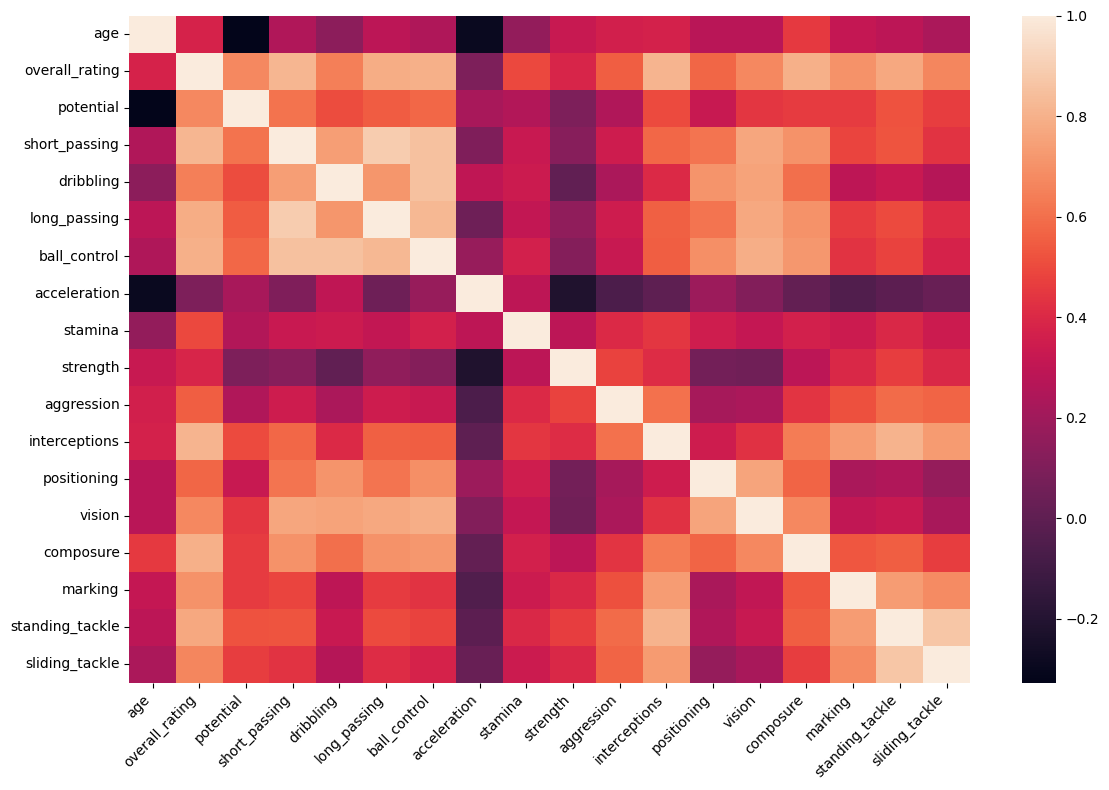

In [22]:
best_cdm_corr = best_cdm.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(best_cdm_corr, annot_kws={"size": 8, 'color':'black'}, cbar=True, clip_on=False)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('Q1a.png')
plt.show()

In [23]:
categories = ['short passing', 'interceptions', 'composure', 'ball control', 'long passing']
sergio_bus = [89, 87, 93, 88, 82]
avg_metrics = [best_cdm['short_passing'].mean(), best_cdm['interceptions'].mean(), best_cdm['composure'].mean(), best_cdm['ball_control'].mean(), best_cdm['long_passing'].mean()]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=sergio_bus,
    theta=categories,
    fill='toself',
    name='Sergio Busquets'
))
fig.add_trace(go.Scatterpolar(
    r = avg_metrics,
    theta=categories,
    fill='toself',
    name='Average'
))

fig.update_layout(
    title_text ='Sergio Busquets VS CDMs',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )),
    showlegend=True
)
fig.write_image('Q1b.png')
fig.show()



[68.53427195257503,
 64.68395702111893,
 63.10003705075954,
 65.89292330492775,
 65.24638755094479]

[68.53427195257503,
 64.68395702111893,
 63.10003705075954,
 65.89292330492775,
 65.24638755094479]

In [24]:
Ngolo_Kante = [86, 92, 85, 80, 82]

fig2 = go.Figure()

fig2.add_trace(go.Scatterpolar(
        r=Ngolo_Kante, 
        theta = categories,
        fill = 'toself',
        name= 'NGolo Kante'
    ))

fig2.add_trace(go.Scatterpolar(
        r=avg_metrics, 
        theta = categories, 
        fill='toself',
        name = 'Avergae'
    ))

fig2.update_layout(
    title_text ='NGolo Kante VS CDMs',
    polar=dict(
        radialaxis=dict(
            visible =True,
            range=[0,100]

        )),
    showlegend=True
)
fig2.write_image('Q1c.png') 
fig2.show()

In [25]:
Ivan_Rakitic = [87, 81, 86, 85, 90]


# [68.53427195257503,64.68395702111893,63.10003705075954,65.89292330492775,65.24638755094479]

fig3 = go.Figure()

fig3.add_trace(go.Scatterpolar(
    r=Ivan_Rakitic, 
    theta = categories,
    fill = 'toself',
    name= 'Ivan Rakitic'
))

fig3.add_trace(go.Scatterpolar(
    r=avg_metrics,
    theta = categories, 
    fill = 'toself', 
    name= 'Average'
))

fig3.update_layout(
    title_text ='Ivan Rakitic VS CDMs',
    polar=dict(
        radialaxis = dict(
            visible = True, 
            range= [0,100]
        )), 
    showlegend=True
)
fig3.write_image('Q1d.png') 
fig3.show()

In [26]:
Casemiro =[83, 86, 84, 78, 82]



fig4 = go.Figure()

fig4.add_trace(go.Scatterpolar(
    r = Casemiro, 
    theta = categories, 
    fill = 'toself',
    name = 'Casemiro'))

fig4.add_trace(go.Scatterpolar(
    r = avg_metrics,
    theta = categories, 
    fill = 'toself',
    name = 'Average' 
))

fig4.update_layout(
    title_text = 'Casemiro Vs CDMs',
    polar=dict(
        radialaxis = dict(
            visible = True, 
            range= [0,100]
        )), 
    showlegend = True
)
fig4.write_image('Q1e.png') 
fig4.show()

In [27]:
Thiago = [90, 78, 85, 90, 87]

fig5 = go.Figure()

fig5.add_trace(go.Scatterpolar(
    r = Thiago, 
    theta = categories,
    fill = 'toself', 
    name = 'Thiago'))

fig5.add_trace(
    go.Scatterpolar(
        r = avg_metrics,
        theta = categories, 
        fill = 'toself',
        name = 'Average'))

fig5.update_layout(
    title_text = 'Thiago Vs CDMs',
    polar=dict(
        radialaxis = dict(
            visible = True, 
            range= [0,100]
        )), 
    showlegend = True
)
fig5.write_image('Q1f.png') 
fig5.show()

### b) Analysis 2

In [28]:
overall_rating_influence = rating_influence.corrwith(rating_influence['overall_rating'], numeric_only=True).sort_values(ascending=False).head(6) #influences a players overall rating are these below

display(overall_rating_influence)


value_rating_influence = rating_influence.corrwith(rating_influence['value_euro'], numeric_only=True).sort_values(ascending=False).head(6) #The variables that strongly influence the value of the player

value_rating_influence

overall_rating     1.000000
reactions          0.855767
national_rating    0.733395
composure          0.729278
potential          0.647249
value_euro         0.630928
dtype: float64

value_euro                       1.000000
international_reputation(1-5)    0.644610
overall_rating                   0.630928
national_rating                  0.586039
potential                        0.576341
reactions                        0.547615
dtype: float64

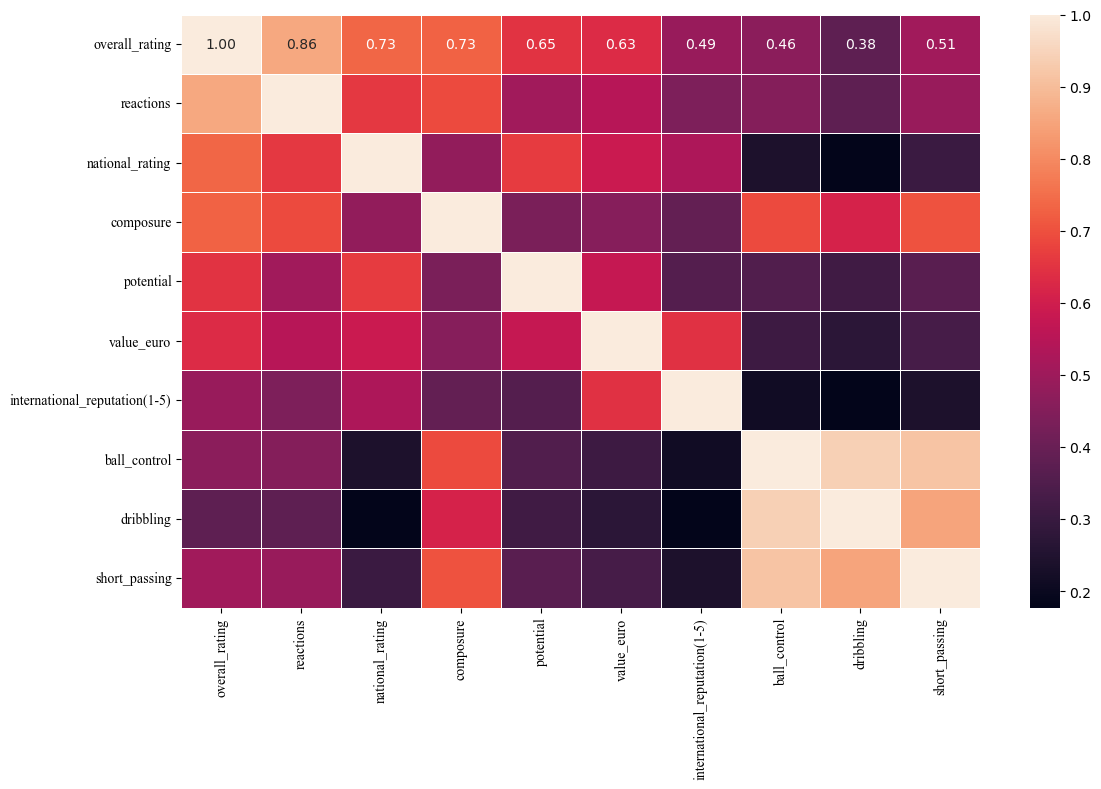

In [29]:
corr_col = ['overall_rating', 'reactions', 'national_rating', 'composure', 'potential', 'value_euro', 'international_reputation(1-5)', 'ball_control', 'dribbling', 'short_passing']
rating_influence_corr = rating_influence[corr_col].corr()

# 10 of the most impactful variables for both the overall rating and the value_euro
plt.figure(figsize=(12, 8))
sns.heatmap(rating_influence_corr, annot=True, fmt='.2f', linewidths=0.5)
plt.xticks(fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.savefig('Q2a.png')
plt.tight_layout()

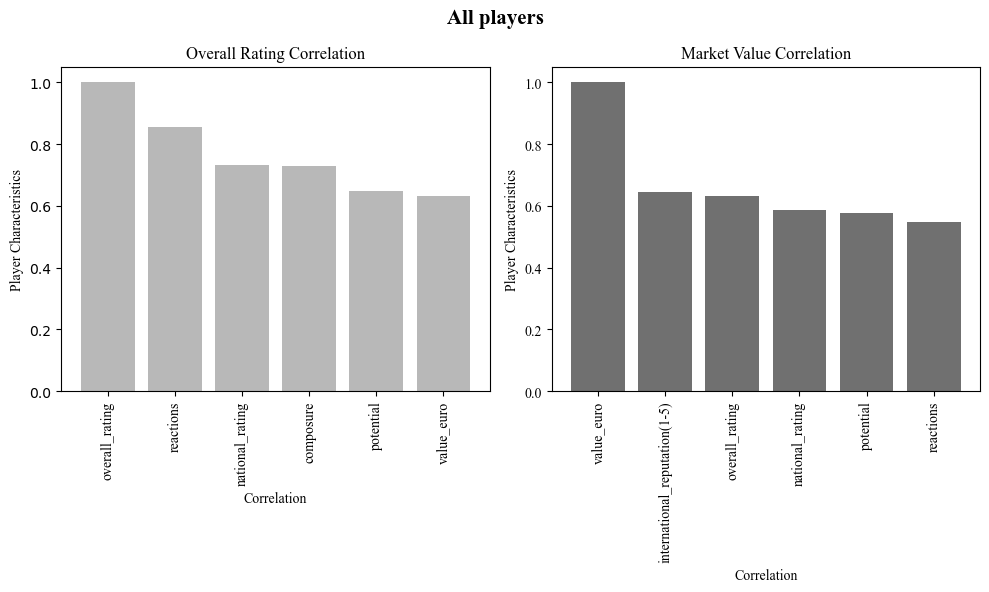

In [30]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.bar(overall_rating_influence.index, overall_rating_influence.values, color = '#b8b8b8')
plt.xlabel('Correlation', fontfamily='Times New Roman')
plt.ylabel('Player Characteristics', fontfamily='Times New Roman')
plt.title('Overall Rating Correlation', fontfamily='Times New Roman')
plt.xticks(rotation=90, fontfamily='Times New Roman')
plt.tight_layout()


plt.subplot(1,2,2)
plt.bar(value_rating_influence.index, value_rating_influence.values, color = '#707070')
plt.xlabel('Correlation', fontfamily='Times New Roman')
plt.ylabel('Player Characteristics', fontfamily='Times New Roman')
plt.title('Market Value Correlation', fontfamily='Times New Roman')
plt.xticks(rotation=90, fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.suptitle('All players', fontfamily='Times New Roman', fontweight='bold', fontsize=15)
plt.tight_layout()
plt.savefig('Q2b.png')

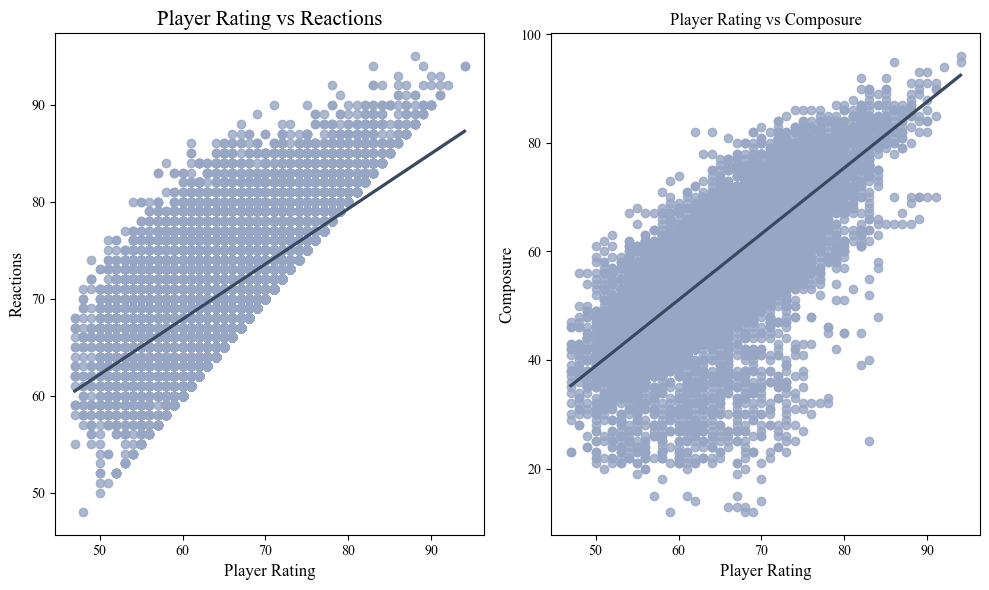

In [31]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.regplot(data=rating_influence, x='overall_rating', y='potential',line_kws={'color':'#384860'}, scatter_kws={'color':'#97a6c4'})
plt.xlabel('Player Rating', fontfamily='Times New Roman', fontsize = 12)
plt.ylabel('Reactions', fontfamily='Times New Roman', fontsize = 12)
plt.title('Player Rating vs Reactions', fontfamily='Times New Roman', fontsize = 15)
plt.xticks(fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.tight_layout()

plt.subplot(1,2,2)
sns.regplot(data =rating_influence, x='overall_rating', y='composure', line_kws={'color':'#384860'}, scatter_kws={'color':'#97a6c4'})
plt.xlabel('Player Rating', fontfamily='Times New Roman', fontsize=12)
plt.ylabel('Composure', fontfamily='Times New Roman', fontsize=12)
plt.title('Player Rating vs Composure', fontfamily='Times New Roman', fontsize=12)
plt.xticks(fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.tight_layout()
plt.savefig('Q2c.png')

In [32]:
#plt.subplot(1,2,1)
#sns.regplot(data=value_rating_influence, x='value_euro', y='overall_rating')

rating_influence['value_euro_bins'] = pd.qcut(rating_influence['value_euro'],q=6, labels=['Talent', 'Squad Rotation', 'Reliable Performer', 'Key Player', 'Star Asset', 'Elite'])

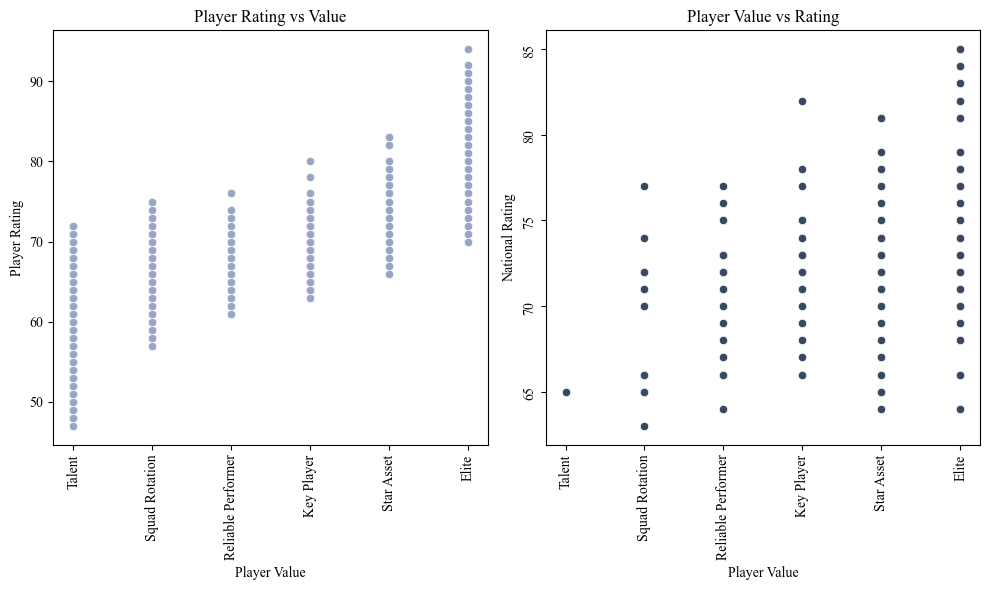

In [33]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.scatterplot(data=rating_influence, x='value_euro_bins', y ='overall_rating', color = '#97a6c4')
plt.xlabel('Player Value', fontfamily='Times New Roman')
plt.ylabel('Player Rating', fontfamily='Times New Roman')
plt.title('Player Rating vs Value', fontfamily='Times New Roman')
plt.xticks(rotation=90, fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.tight_layout()

plt.subplot(1,2,2)
sns.scatterplot(data=rating_influence, x = 'value_euro_bins', y ='national_rating', color = '#384860')
plt.xlabel('Player Value', fontfamily='Times New Roman')
plt.ylabel('National Rating', fontfamily='Times New Roman')
plt.title('Player Value vs Rating', fontfamily='Times New Roman')
plt.xticks(rotation=90, fontfamily='Times New Roman')
plt.yticks(rotation=90, fontfamily='Times New Roman')
plt.tight_layout()
plt.savefig('Q2d.png')

In [34]:
attackers_rating_influence = attacking_players.corrwith(attacking_players['value_euro'], numeric_only=True).sort_values(ascending=False).head(6) #The variables that strongly influence the value of the player

attacking_overall_influence = attacking_players.corrwith(attacking_players['overall_rating'], numeric_only=True).sort_values(ascending=False).head(6)

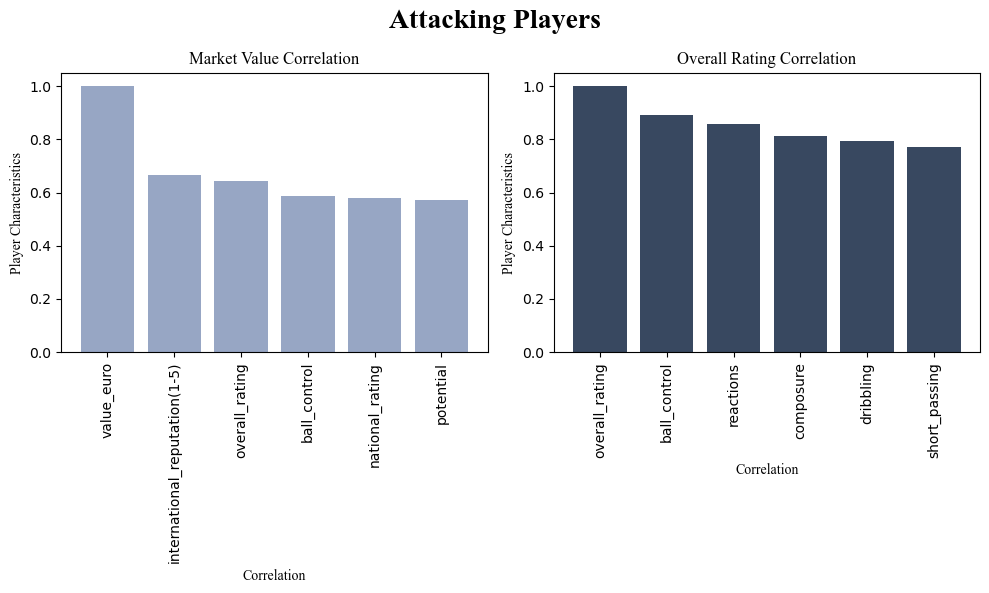

In [35]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(attackers_rating_influence.index, attackers_rating_influence.values, color = '#97a6c4')
plt.xlabel('Correlation', fontfamily='Times New Roman')
plt.ylabel('Player Characteristics', fontfamily='Times New Roman')
plt.title('Market Value Correlation', fontfamily='Times New Roman')
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(1,2,2)
plt.bar(attacking_overall_influence.index, attacking_overall_influence.values, color = '#384860')
plt.xlabel('Correlation', fontfamily='Times New Roman')
plt.ylabel('Player Characteristics', fontfamily='Times New Roman')
plt.title('Overall Rating Correlation', fontfamily='Times New Roman')
plt.suptitle('Attacking Players', weight = 'bold', fontfamily='Times New Roman', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Q2e.png')

In [36]:
defending_value_euro = defending_players.corrwith(defending_players['value_euro'], numeric_only=True).sort_values(ascending=False).head(6)

overall_rating     1.000000
reactions          0.852339
national_rating    0.740413
composure          0.714691
potential          0.664034
value_euro         0.655874
dtype: float64

value_euro                       1.000000
overall_rating                   0.655874
national_rating                  0.634860
international_reputation(1-5)    0.615091
potential                        0.608016
reactions                        0.557178
dtype: float64

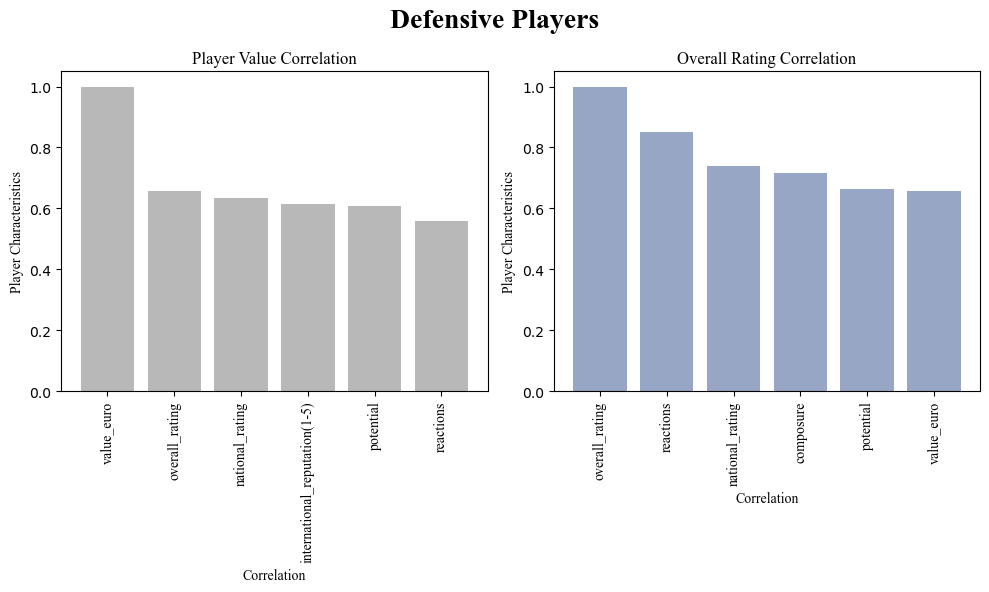

In [37]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(defending_value_euro.index, defending_value_euro.values, color ='#b8b8b8')
plt.xlabel('Correlation', fontfamily='Times New Roman')
plt.ylabel('Player Characteristics', fontfamily='Times New Roman')
plt.title('Player Value Correlation', fontfamily='Times New Roman')
plt.xticks(rotation=90, fontfamily='Times New Roman')
plt.tight_layout()

defending_rating_influence = defending_players.corrwith(defending_players['overall_rating'], numeric_only=True).sort_values(ascending=False).head(6)
display(defending_rating_influence)
display(defending_value_euro)

plt.subplot(1,2,2)
plt.bar(defending_rating_influence.index, defending_rating_influence.values, color='#97a6c4')
plt.xlabel('Correlation', fontfamily='Times New Roman')
plt.ylabel('Player Characteristics', fontfamily='Times New Roman')
plt.title('Overall Rating Correlation', fontfamily='Times New Roman')
plt.xticks(rotation=90, fontfamily='Times New Roman')
plt.suptitle('Defensive Players', fontfamily='Times New Roman', weight='bold', fontsize=20)
plt.tight_layout()
plt.savefig('Q2f.png')

### c) Analysis 3 

In [38]:
#How does a players performance vary by age? 
age_analysis[['age','age_bins']].head(5)

,age,age_bins
0,31,Senior Adults
1,27,Adults
2,25,Adults
3,27,Adults
4,27,Adults


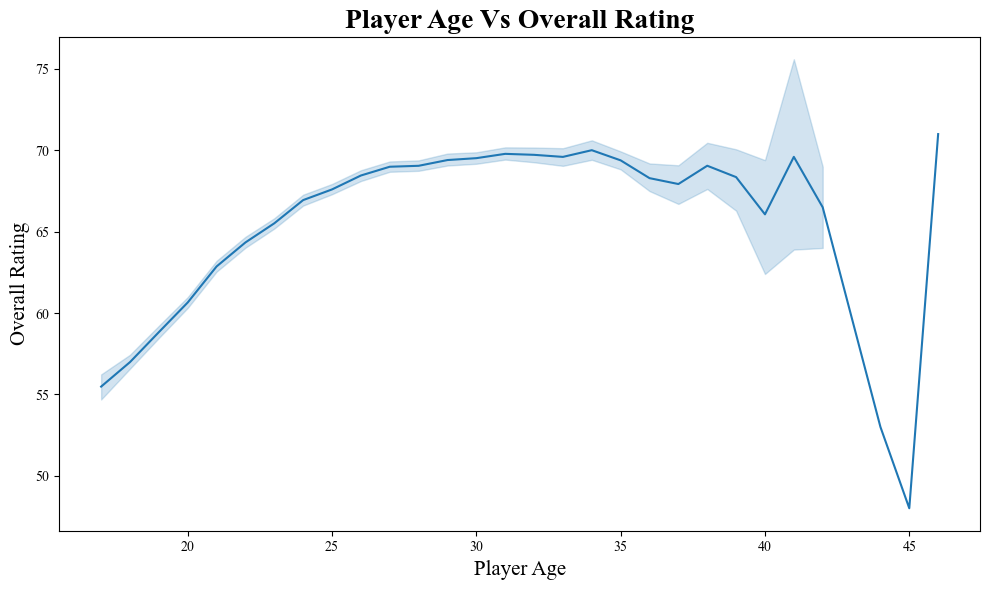

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(data=age_analysis, x='age', y='overall_rating')
plt.xlabel('Player Age', fontfamily='Times New Roman', fontsize=15)
plt.ylabel('Overall Rating', fontfamily='Times New Roman', fontsize=15)
plt.title('Player Age Vs Overall Rating', fontfamily='Times New Roman', fontsize=20,weight='bold')
plt.xticks(fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.tight_layout()
plt.savefig('Q3a.png')

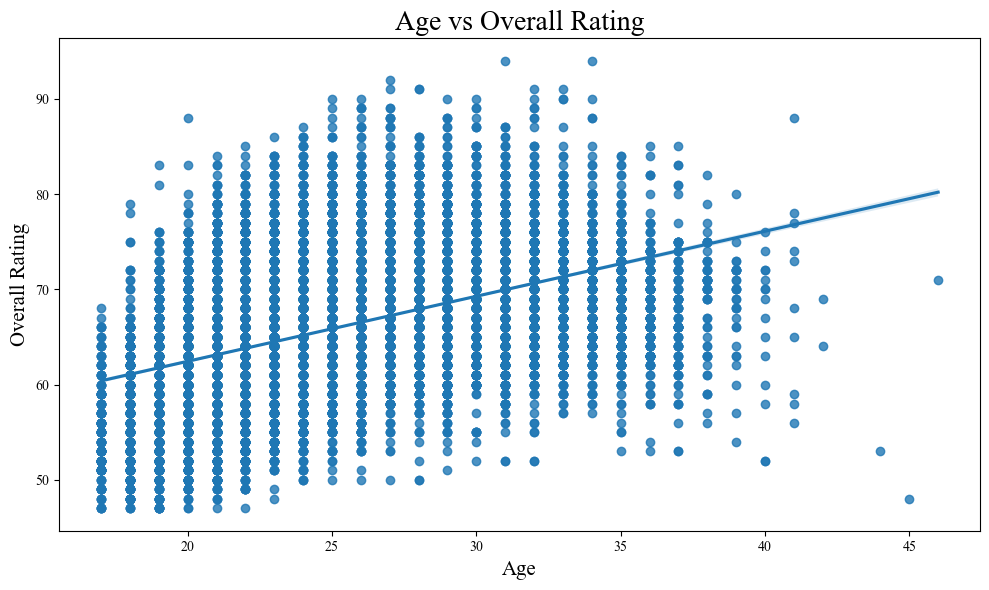

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(data=age_analysis, x='age',y='overall_rating')
plt.xlabel('Age', fontfamily='Times New Roman', fontsize=15)
plt.ylabel('Overall Rating', fontfamily='Times New Roman', fontsize=15)
plt.title('Age vs Overall Rating', fontfamily='Times New Roman', fontsize=20)
plt.xticks(fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.tight_layout()
plt.savefig('Q3b.png')

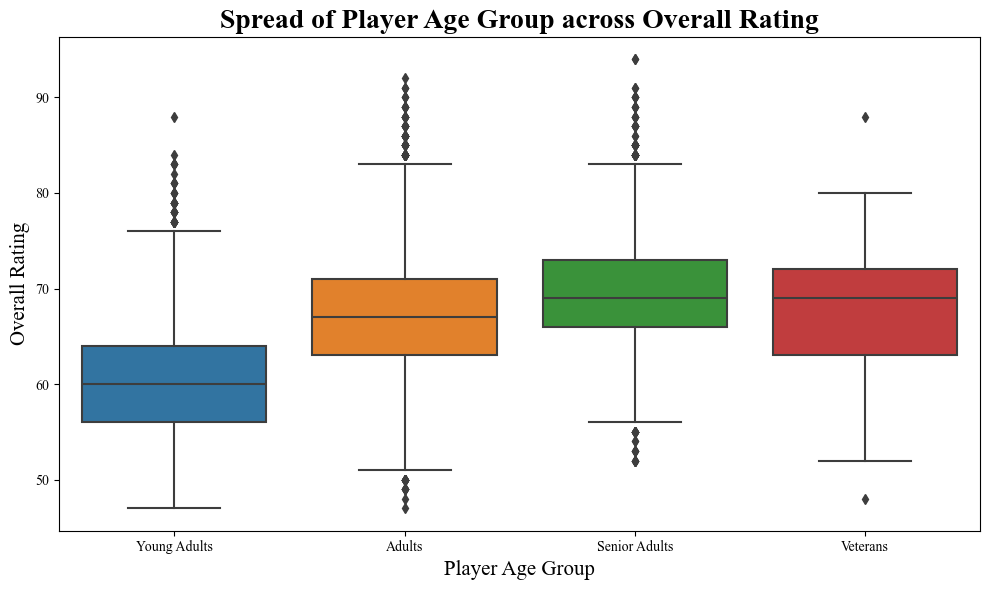

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data = age_analysis, x='age_bins', y='overall_rating')
plt.xlabel('Player Age Group', fontfamily='Times New Roman', fontsize=15)
plt.ylabel('Overall Rating', fontfamily='Times New Roman', fontsize=15)
plt.title('Spread of Player Age Group across Overall Rating', fontfamily='Times New Roman', fontsize=20, weight='bold')
plt.xticks(fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.tight_layout()
plt.savefig('Q3c.png')

In [42]:
age_analysis.columns

cat = ['acceleration', 'sprint_speed', 'dribbling','ball_control','finishing','short_passing','stamina','strength']

age_bins_analysis = age_analysis.groupby(by='age_bins')[cat].agg('mean').reset_index()

In [43]:
age_bins_analysis

,age_bins,acceleration,sprint_speed,dribbling,ball_control,finishing,short_passing,stamina,strength
0,Young Adults,64.696059,64.424204,52.295604,53.794088,41.469934,53.781203,57.196311,57.929763
1,Adults,66.822021,67.088587,57.153947,59.950025,46.720362,60.067672,65.842031,66.451785
2,Senior Adults,59.646459,59.764045,54.152861,58.986151,46.348837,60.229161,63.125947,69.863339
3,Veterans,39.540984,40.131148,33.590164,41.049180,30.081967,44.967213,37.983607,66.000000


In [44]:
cat = ['Acceleration', 'Sprint Speed', 'Dribbling', 'Ball Control', 'Finishing', 'Short Passing', 'Stamina', 'Strength']
young_adults=[64.69, 64.42, 52.29, 53.79, 41.46, 53.78, 57.19, 57.92]
adults = [66.82, 67.08, 57.15, 59.95, 46.72, 60.06, 65.84, 66.45]
senior_adults = [59.64, 59.76, 54.15, 58.98, 46.34, 60.22, 63.12, 69.86]
veterans = [39.54, 40.13, 33.59, 41.04, 30.08, 44.96, 37.98, 66]

fig6 = go.Figure()

fig6.add_trace(go.Scatterpolar(
    r = young_adults,
    theta=cat,
    fill='toself',
    name='Young Adults'))
fig6.add_trace(go.Scatterpolar(
    r=adults,
    theta=cat,
    fill='toself',
    name='Adults'))
fig6.add_trace(
    go.Scatterpolar(
        r=senior_adults,
        theta=cat,
        fill = 'toself',
        name='Senior Adults'))

fig6.add_trace(
    go.Scatterpolar(
        r=veterans, 
        theta=cat,
        fill='toself',
        name='Veterans'))
fig6.update_layout(
    polar=dict(
        radialaxis = dict(
            visible = True, 
            range= [0,100]
        )), 
    showlegend = True)
fig6.write_image('Q3d.png')
fig6.show()

### d) Analysis 4

In [45]:
# Which nationalities produce the highest-rated players, and how consistent is player quality across countries?

soccer['nationality'].isnull().sum()

number_of_nations = soccer['nationality'].nunique()
print(f'There are {number_of_nations} different nations that are made up of this dataset.')

soccer.columns

There are 160 different nations that are made up of this dataset.


Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [46]:
player_nationality = soccer.copy()

OR_sorted = player_nationality.groupby('nationality')[['overall_rating', 'potential', 'value_euro']].agg({'overall_rating':['mean','count','std'], 'potential':'mean', 'value_euro':'mean'}).reset_index()
OR_sorted = OR_sorted[OR_sorted[('overall_rating','count')] > 20]

top_10_countries = OR_sorted.sort_values(by=[('overall_rating','mean'), ('overall_rating','count')], ascending=False).head(10)

top_10_countries
# Decided to discard countries that have less than 20 players to avoid noisy small-sample countries.
OR_sorted

nationality overall_rating                  potential    value_euro
                             mean count       std       mean          mean
1          Albania      66.380952    42  5.792983  71.309524  1.953571e+06
2          Algeria      70.866667    60  5.487943  72.900000  4.856250e+06
6        Argentina      68.667035   904  6.273993  73.507743  3.211847e+06
8        Australia      62.612069   232  6.079234  68.237069  7.911688e+05
9          Austria      65.221477   298  6.081761  70.036913  1.681527e+06
..             ...            ...   ...       ...        ...           ...
149        Ukraine      70.318841    69  5.799322  75.289855  4.038768e+06
151  United States      64.615616   333  6.111612  71.033033  1.206426e+06
152        Uruguay      70.748148   135  6.261370  74.081481  5.297707e+06
154      Venezuela      67.034483    58  6.081221  72.517241  2.596226e+06
156          Wales      64.246154   130  6.777827  69.900000  1.775742e+06

[74 rows x 6 columns]

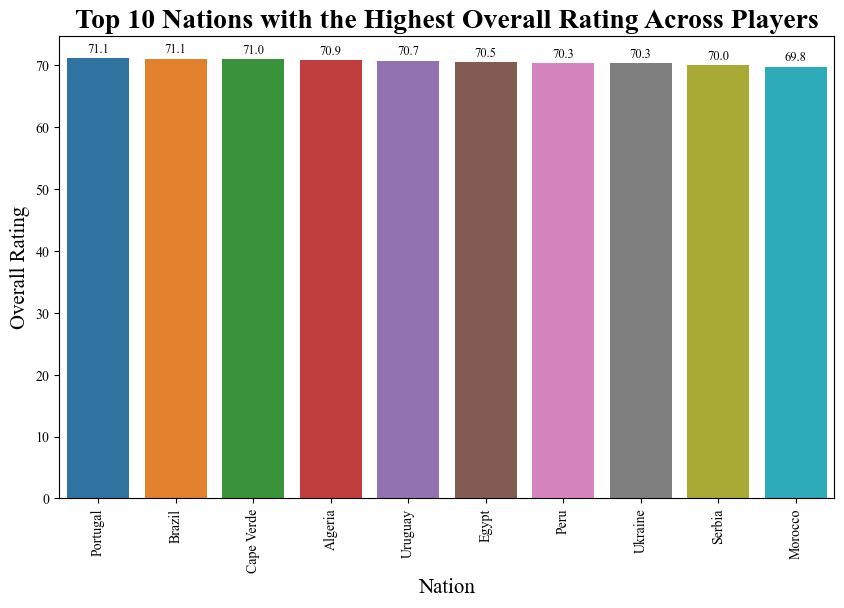

In [47]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_10_countries, x='nationality', y =('overall_rating', 'mean'))
for container in ax.containers:
    ax.bar_label(container, fontsize=9, fmt='%.1f', padding=2, fontfamily='Times New Roman')
plt.xticks(rotation=90, fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.xlabel('Nation', fontfamily='Times New Roman', fontsize=15)
plt.ylabel('Overall Rating', fontfamily='Times New Roman', fontsize=15)
plt.title('Top 10 Nations with the Highest Overall Rating Across Players', fontfamily='Times New Roman', fontsize=20, weight='bold')
plt.savefig('Q4a.png')

In [48]:
top10_country_name = top_10_countries['nationality'].values.tolist()

top10_country_name

['Portugal',
 'Brazil',
 'Cape Verde',
 'Algeria',
 'Uruguay',
 'Egypt',
 'Peru',
 'Ukraine',
 'Serbia',
 'Morocco']

In [49]:
only_top10_cont = soccer[soccer['nationality'].isin(top10_country_name)]
only_top10_cont.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
9,E. Cavani,Edinson Roberto Cavani Gómez,2/14/1987,32,185.42,77.1,ST,Uruguay,89,89,...,79,84,48,93,77,85,82,52,45,39
14,M. Salah,Mohamed Salah Ghaly,6/15/1992,26,175.26,71.2,"RW,ST",Egypt,89,90,...,83,63,55,92,84,75,91,38,43,41
17,Fernandinho,Fernando Luiz Rosa,5/4/1985,33,152.40,67.1,CDM,Brazil,87,87,...,78,87,89,70,75,61,79,87,86,80
22,Marcelo,Marcelo Vieira da Silva Júnior,5/12/1988,30,175.26,79.8,LB,Brazil,87,87,...,70,84,83,85,82,59,86,71,82,83
30,Casemiro,Carlos Henrique Venancio Casimiro,2/23/1992,27,185.42,83.9,CDM,Brazil,87,89,...,81,89,86,69,77,66,84,84,87,86


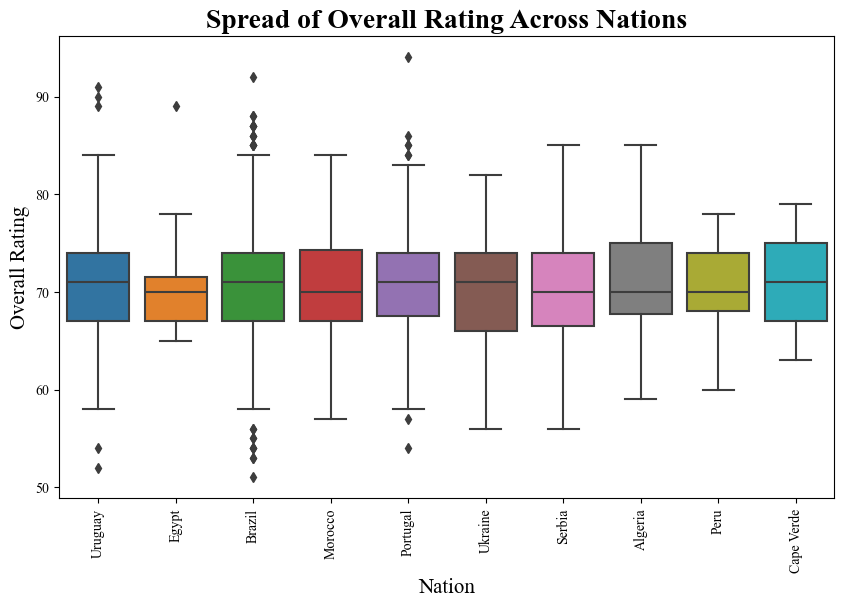

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(data=only_top10_cont, x ='nationality', y ='overall_rating')
plt.xticks(rotation=90, fontfamily='Times New Roman')
plt.yticks(fontfamily='Times New Roman')
plt.xlabel('Nation', fontfamily='Times New Roman', fontsize=15)
plt.ylabel('Overall Rating', fontfamily='Times New Roman', fontsize=15)
plt.title('Spread of Overall Rating Across Nations', fontfamily='Times New Roman', weight='bold', fontsize=20)
plt.savefig('Q4b.png')

nationality overall_rating                  potential    value_euro
                          mean count       std       mean          mean
119    Portugal      71.113433   335  5.506580  75.191045  4.871527e+06
18       Brazil      71.051683   832  5.710924  73.344952  4.527726e+06
24   Cape Verde      70.952381    21  4.831937  73.761905  4.088333e+06
2       Algeria      70.866667    60  5.487943  72.900000  4.856250e+06
152     Uruguay      70.748148   135  6.261370  74.081481  5.297707e+06
42        Egypt      70.483871    31  4.877643  72.419355  7.632941e+06
116        Peru      70.333333    36  4.063777  73.305556  3.112778e+06
149     Ukraine      70.318841    69  5.799322  75.289855  4.038768e+06
127      Serbia      70.030534   131  5.851941  73.366412  4.120038e+06
101     Morocco      69.809524    84  5.617263  73.321429  3.795179e+06

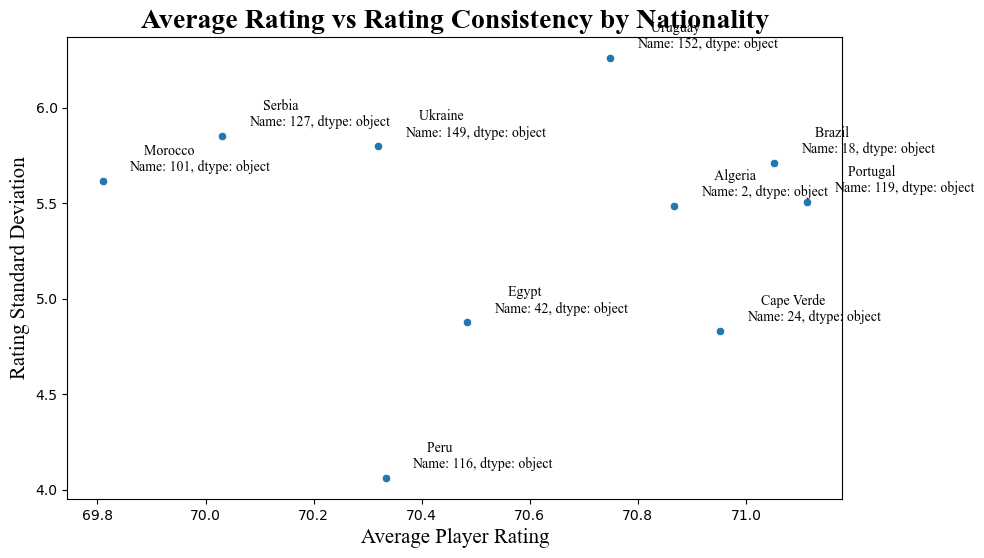

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=top_10_countries, x =('overall_rating','mean'), y =('overall_rating', 'std'))

for i, row in top_10_countries.iterrows():
    plt.text(row[('overall_rating','mean')] + 0.05, row[('overall_rating','std')] + 0.05, row['nationality'], fontsize=10, fontfamily='Times New Roman')

plt.xlabel('Average Player Rating', fontfamily='Times New Roman', fontsize=15)
plt.ylabel('Rating Standard Deviation', fontfamily='Times New Roman', fontsize=15)
plt.title('Average Rating vs Rating Consistency by Nationality', fontfamily='Times New Roman', fontsize=20, weight='bold')
plt.savefig('Q4c.png')
display(top_10_countries)